# Lab Tutorial 02
### Learning Outcomes 
In this tutorial we will learn 
- to create 2D numpy arrays and work with them
- how to use plt.subplots to have multiple plots
- about n-dimensional numpy arrays
- how to create a contingency table and work with it
- how to group data by a specific variable (like gender)

We will be using the student performance dataset found here:\
https://www.kaggle.com/spscientist/students-performance-in-exams

<font color = 'red'> __TALK ABOUT NAN VALUES AND HOW USING PD.CROSSTAB HANDLES THEM. FEW STUDENTS USED THEIR OWN METHOD FOR CALCULATING THE PROBABILITIES IN TASK 3. THEIR METHOD DID NOT HANDLE THE NAN PROBLEM AND THEY GOT DIFFERENT ANSWERS. EMPHASIZE WHAT NANS ARE AND HOW IMPORTANT IT IS TO HANDLE THEM. I HAVE ADDED THE NOTEBOOK FOR ONE OF THE STUDENTS THAT USED A METHOD OTHER THAN PD.CROSSTAB__

## importing packages


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

# Python prerequisites

## Working with n-dimensional numpy arrays

### different ways to create n-dimensional arrays

In [3]:
# all zeros
myZeros = np.zeros((4, 4))
[r, c] = myZeros.shape
print(myZeros,r,c)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 4 4


In [16]:
myArray = np.array([[1, 2, 3],[2, 3, 5]])
[r,c] = myArray.shape 
print(myArray,r,c)

[[1 2 3]
 [2 3 5]] 2 3


In [5]:
# your array
myArray = np.array([[1, 2, 3],[2, 3, 5]])
[r, c] = myArray.shape
print(myArray,r,c) 

[[1 2 3]
 [2 3 5]] 2 3


In [19]:
random_1 = np.random.normal(size = 4)

In [20]:
random_2 = np.random.normal(size = 4)

In [22]:
myArray2 = np.array([random_1,random_2])

In [6]:
# array of random numbers
myArray2 = np.array([np.random.normal(size = 4), np.random.normal(size = 4)])
[r, c] = myArray2.shape
print(myArray2,r,c)  


[[-0.81064903  1.4894682   1.61878088  0.92864475]
 [-0.11232611 -1.23924983  0.66638017 -0.6156785 ]] 2 4


In [77]:
# all ones
myOnes = np.ones((4, 4))
[r, c] = myOnes.shape
print(myOnes,r,c)  

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 4 4


## indexing rows and columns of a 2D array

In [35]:
# more on indexing 1D arrays first 
arr = np.array([10, 20, 30, 40, 50]) 
arr[4]  ## arr[4] = arr[-1] , arr[0] = arr[-5]  
arr[arr > 25] 

array([30, 40, 50])

In [56]:
# indexing 2D array 
array_2d = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
print(matrix) 

print(matrix[0,0]) # output:1
print(matrix[0,1]) # output:2
print(matrix[1,1]) # output:5

print(matrix[0,:]) # output:[1,2,3] : extract 1st row 
print(matrix[:,0]) # output:[1,4,7] : extract 1st column 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1
2
5
[1 2 3]
[1 4 7]


In [54]:
print(matrix[0:2,:]) # never include index 2 
print(matrix[:,1:3]) 

print(matrix[0:2,1:3]) ## first 2 rows, last 2 columns

[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]
 [8 9]]
[[2 3]
 [5 6]]


### looping through elements of a 2D array

In [70]:
array_2d.shape

(3, 3)

In [59]:
# Looping throw rows and columns using two for-loops
for row in range(array_2d.shape[0]): # loop the rows 
    for col in range(array_2d.shape[1]):
        print(f"Element at ({row},{col}):{array_2d[row,col]}")

Element at (0,0):1
Element at (0,1):2
Element at (0,2):3
Element at (1,0):4
Element at (1,1):5
Element at (1,2):6
Element at (2,0):7
Element at (2,1):8
Element at (2,2):9


## String formatting and print statements using f-strings

In [78]:
# String formatting: https://www.w3schools.com/python/python_string_formatting.asp

string = 'Hello'
print(f"{string} Good morning")

integer = 2
print(f"the integer is {integer:d} (using d)" )
print(f"the integer is {integer:f} (using f)" )
print(f"the integer is {integer:4.2f} (f with places before and after decimal points)\n" )

number = 0.2
print(f"the number is {number:f} (using f)" )
print(f"the number is {number:4.2f} (f with places before and after decimal points)\n" )

number = 1/3
print(f"the number is {number:f} (using f)" )
print(f"the number is {number:4.2f} (f with places before and after decimal points)\n" )

# how to have nice print statements
## * Use print statements to check the code
print(f"myOnes variable is a {type(myOnes)} variable")

Hello Good morning
the integer is 2 (using d)
the integer is 2.000000 (using f)
the integer is 2.00 (f with places before and after decimal points)

the number is 0.200000 (using f)
the number is 0.20 (f with places before and after decimal points)

the number is 0.333333 (using f)
the number is 0.33 (f with places before and after decimal points)

myOnes variable is a <class 'numpy.ndarray'> variable


# The Student performance datasete

## load in the dataset

In [81]:
# load, display, get the columns and rows
df = pd.read_csv('StudentsPerformance.csv')
display(df.head())
df.columns

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

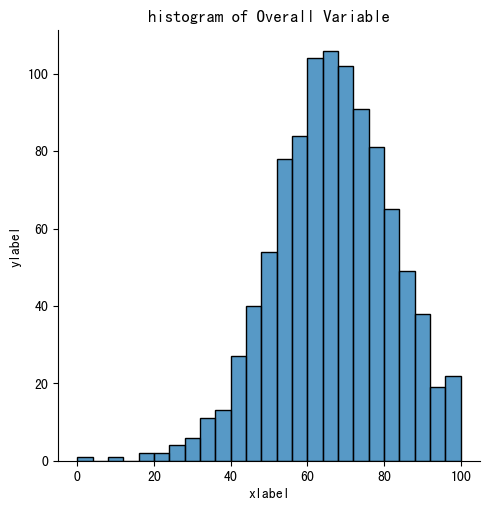

In [84]:
# PLOT HSITOFRAMS OF SOME COLUMS 

ax = sns.displot(df['math score']) 
# Add title and labels
ax.set(title="histogram Plot", xlabel="xlabel", ylabel="ylabel")

## Creating contingency tables

### getting help from documents
if you google pandas crosstab, you'll see that there are two links: one for pandas version 0.25.3 and another for pandas version 0.23.4. 
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Which one do you use? To answer that first you need to find your version of Pandas.

In [85]:
# finding the version of Pandas installed
pd.__version__

'1.4.4'

Now what? my installed version is different from the versions that came up in google search. Two ways to work around:
* google pandas crosstab 0.25.1 (or whatever your version of pandas is)
* google the versions: 0.25.1 and 0.25.3:
https://pandas.pydata.org/pandas-docs/version/0.25/whatsnew/v0.25.3.html

In [89]:
table = pd.crosstab(df['gender'], df['test preparation course'], margins = True)

# what are the first, second, and third inputs
## the first input will be the rows
## the second input the columns 
## set the third input "margins" to True if you want to get the margins as well (it will give you the sum of total )
## print type, indices, and columns
print(f"table variable is of type {type(table)}") # it is a dataframe object and all the methods and attributes of a pandas dataframe can be used 
display(table)
print(f"the first row of the table is {table.iloc[0]}")
print(table.index)

table variable is of type <class 'pandas.core.frame.DataFrame'>


test preparation course,completed,none,All
gender,,,
female,184,334,518
male,174,308,482
All,358,642,1000


the first row of the table is test preparation course
completed    184
none         334
All          518
Name: female, dtype: int64
Index(['female', 'male', 'All'], dtype='object', name='gender')


In [92]:
table.iloc[0]

test preparation course
completed    184
none         334
All          518
Name: female, dtype: int64

In [87]:
# use for loop to get all the rows (1)
## when using i as a number pointing to the index
### with iloc
for i in range(len(table.index)):
    print(f"data on the row number {i} in the table dataframe is {table.iloc[i]}")

data on the row number 0 in the table dataframe is test preparation course
completed    184
none         334
All          518
Name: female, dtype: int64
data on the row number 1 in the table dataframe is test preparation course
completed    174
none         308
All          482
Name: male, dtype: int64
data on the row number 2 in the table dataframe is test preparation course
completed     358
none          642
All          1000
Name: All, dtype: int64


In [93]:
# use for loop to get all the rows (2)
## when using i as the lable of the index itself
### with loc
#### what is the difference between loc and iloc
for i in table.index:
    print(f"data on the row labeled as {i} in the table dataframe is {table.loc[i]}")

data on the row labeled as female in the table dataframe is test preparation course
completed    184
none         334
All          518
Name: female, dtype: int64
data on the row labeled as male in the table dataframe is test preparation course
completed    174
none         308
All          482
Name: male, dtype: int64
data on the row labeled as All in the table dataframe is test preparation course
completed     358
none          642
All          1000
Name: All, dtype: int64


In [94]:
# Use the same method to get the data in each column (ask them to do it and then ask for volunteers)
for j in table.columns:
    print(f"the data in column {j} is: {table[j]}")

the data in column completed is: gender
female    184
male      174
All       358
Name: completed, dtype: int64
the data in column none is: gender
female    334
male      308
All       642
Name: none, dtype: int64
the data in column All is: gender
female     518
male       482
All       1000
Name: All, dtype: int64


### Getting different entries of a contingency table

In [95]:
# you may want to use these entries to calculate different probabilities
display(table)
print(table.columns)
print(table.index)
table['completed']['female'] # the first entry is the column

test preparation course,completed,none,All
gender,,,
female,184,334,518
male,174,308,482
All,358,642,1000


Index(['completed', 'none', 'All'], dtype='object', name='test preparation course')
Index(['female', 'male', 'All'], dtype='object', name='gender')


184

## TO ADD: 
Go thorugh from lecture how you would get 
* Joint probability 
* Marginal probability
* Conditional probability


## Use Groupby method to categorize the dataset

In [96]:
a = df['reading score'].groupby(df['gender'])
display(a)
print(a)

### getting the names of different sub-catogories

In [97]:
a = df.groupby('parental level of education').groups.keys()
type(a) # it is not a numpy array or a list

dict_keys

### getting descriptive statistic by category

In [98]:
stdmScore = df['math score'].groupby(df['gender']).std()
      
print("***** Printing std scores grouped by gender *****")
print(f"the std of math scores grouped by gender is {stdmScore}")
print(f"the std of math score of female students is {stdmScore['female']}")

# you can do the same for min, max, and mean

***** Printing std scores grouped by gender *****
the std of math scores grouped by gender is gender
female    15.491453
male      14.356277
Name: math score, dtype: float64
the std of math score of female students is 15.491453242339517


# Visualization

## Using pandas plot method
see the link below for all the kinds of plotting available <font color = 'red'>__(what are the inputs for grouped bar plot?)__:<br>
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

test preparation course,completed,none
race/ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


array([<AxesSubplot:ylabel='completed'>, <AxesSubplot:ylabel='none'>],
      dtype=object)

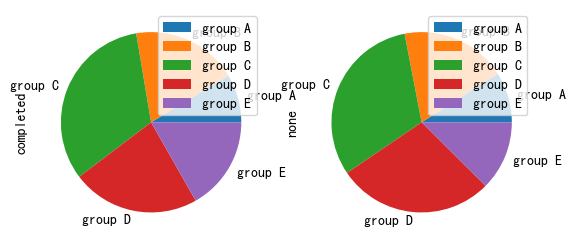

In [99]:
# USE STACKED BAR PLOT INSTEAD OF PIE CHARTS, PLEASe1 


# Use the doc and go over this in the lab
# table2 = pd.crosstab(df['race/ethnicity'], df['test preparation course'], margins = True)
# table2.plot(kind = 'bar', stacked = False)

# lose the last coloumn "All"
table3 = pd.crosstab(df['race/ethnicity'], df['test preparation course'], margins = False)
display(table3)
table3.plot(kind = 'pie', subplots = True)

## Using pyplot subplots to have multiple figures

(2, 2)


Text(0.5, 1.0, 'The violinplot for math score')

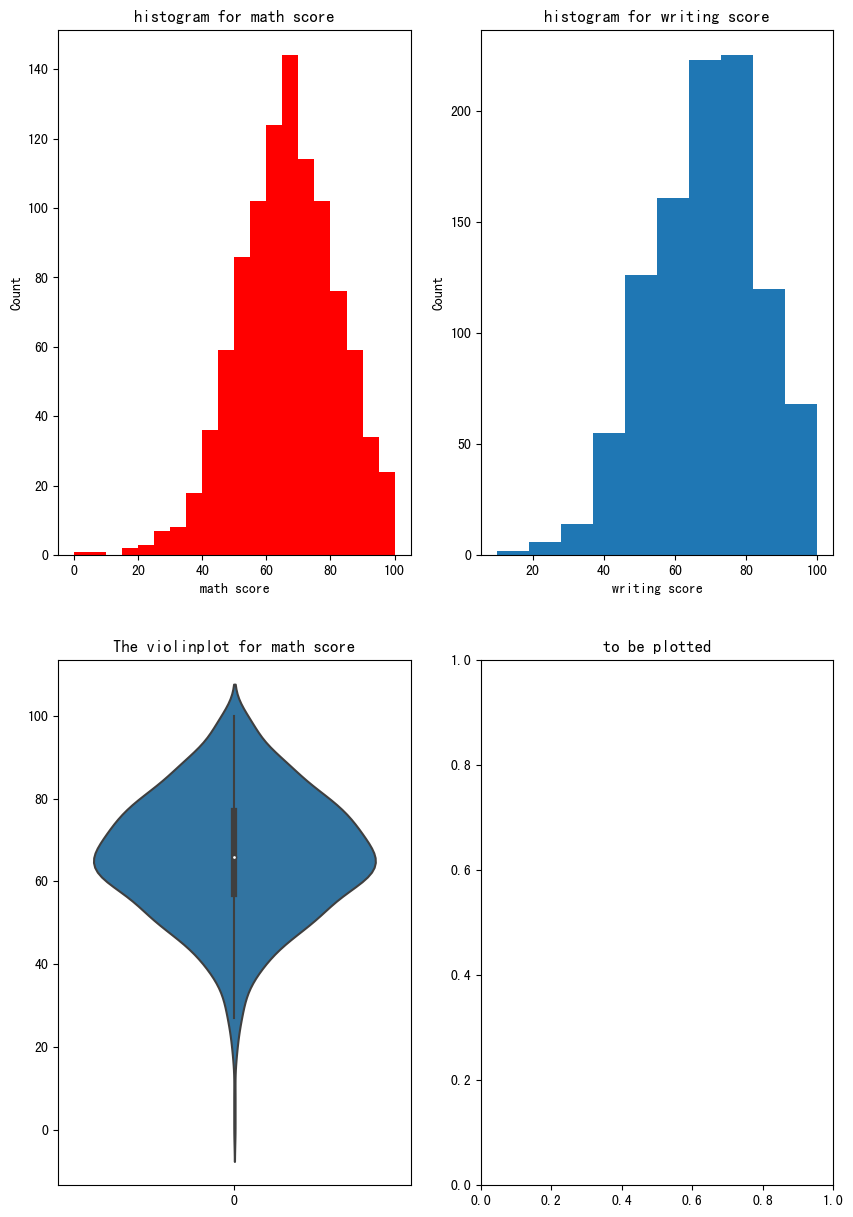

In [100]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 15)) # axes variable is a matplotlib axes object
print(axes.shape)

axes[0, 0].hist(df['math score'], bins = 20, color = 'r') # hist is always the easiest. use color input to set the color
axes[0, 0].set_xlabel('math score')
axes[0, 0].set_ylabel('Count')
df['writing score'].plot(kind = 'hist', ax = axes[0, 1], bins = 10)
axes[0, 1].set_xlabel('writing score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('histogram for writing score')

axes[0, 0].set_title('histogram for math score')

axes[1, 1].set_title('to be plotted')

sns.violinplot(df['math score'], ax = axes[1, 0]) # google seaborn plot with pyplot subplots
axes[1, 0].set_title('The violinplot for math score')

## Have multiple plots in a single figure with different colors

<AxesSubplot:>

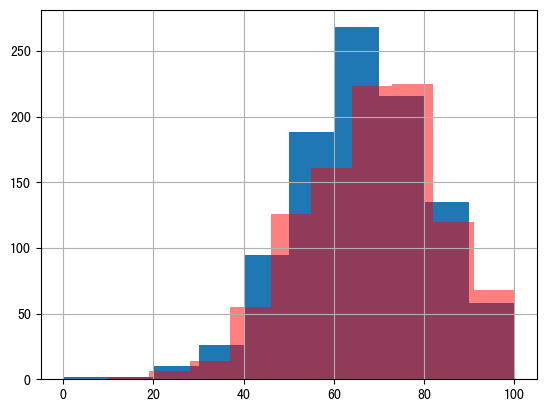

In [101]:
df['math score'].hist()
df['writing score'].hist(color = 'r', alpha = 0.5) # alpha sets the transparency

## multiple violinplots in a single figure

<AxesSubplot:xlabel='gender', ylabel='math score'>

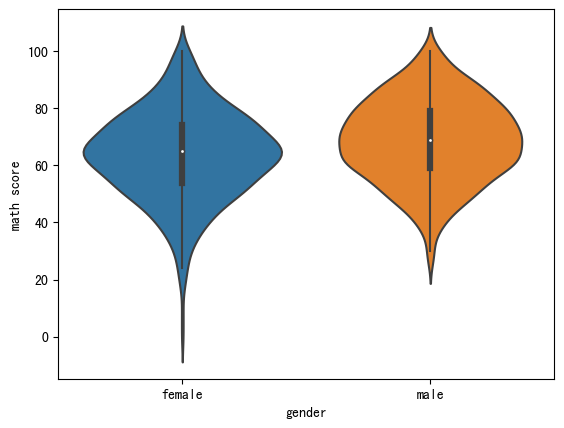

In [102]:
# do it with them! use the doc 
# doc link: https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(x = 'gender', y = 'math score', data = df)